In [203]:
import numpy as np

import pandas as pd

from gtda.time_series import SingleTakensEmbedding   # Implement the sliding window and the time delay embedding method.

from ripser import ripser                            # The Ripser package is used to compute Persistent Homology.

import matplotlib.pyplot as plt


In [204]:
#                                                                                                                                   #
#  The takens_embedding method transforms a time series signal into a point cloud.                                                  #
#                                                                                                                                   #
#  The persistent_homology method is used to compute Persistent Homology and transforms a point cloudd into a persistence diagram.  #
#                                                                                                                                   #
#####################################################################################################################################

def takens_embedding(signal, embedding_dimension):
    
    embedder = SingleTakensEmbedding(parameters_type = "fixed", dimension = embedding_dimension)
    
    point_cloud = embedder.fit_transform(signal)
    
    return point_cloud

def persistent_homology(point_cloud):
    
    persistent_diagram = ripser(point_cloud)['dgms']

    return persistent_diagram 

# Gaussian Noise and 2D Point Cloud

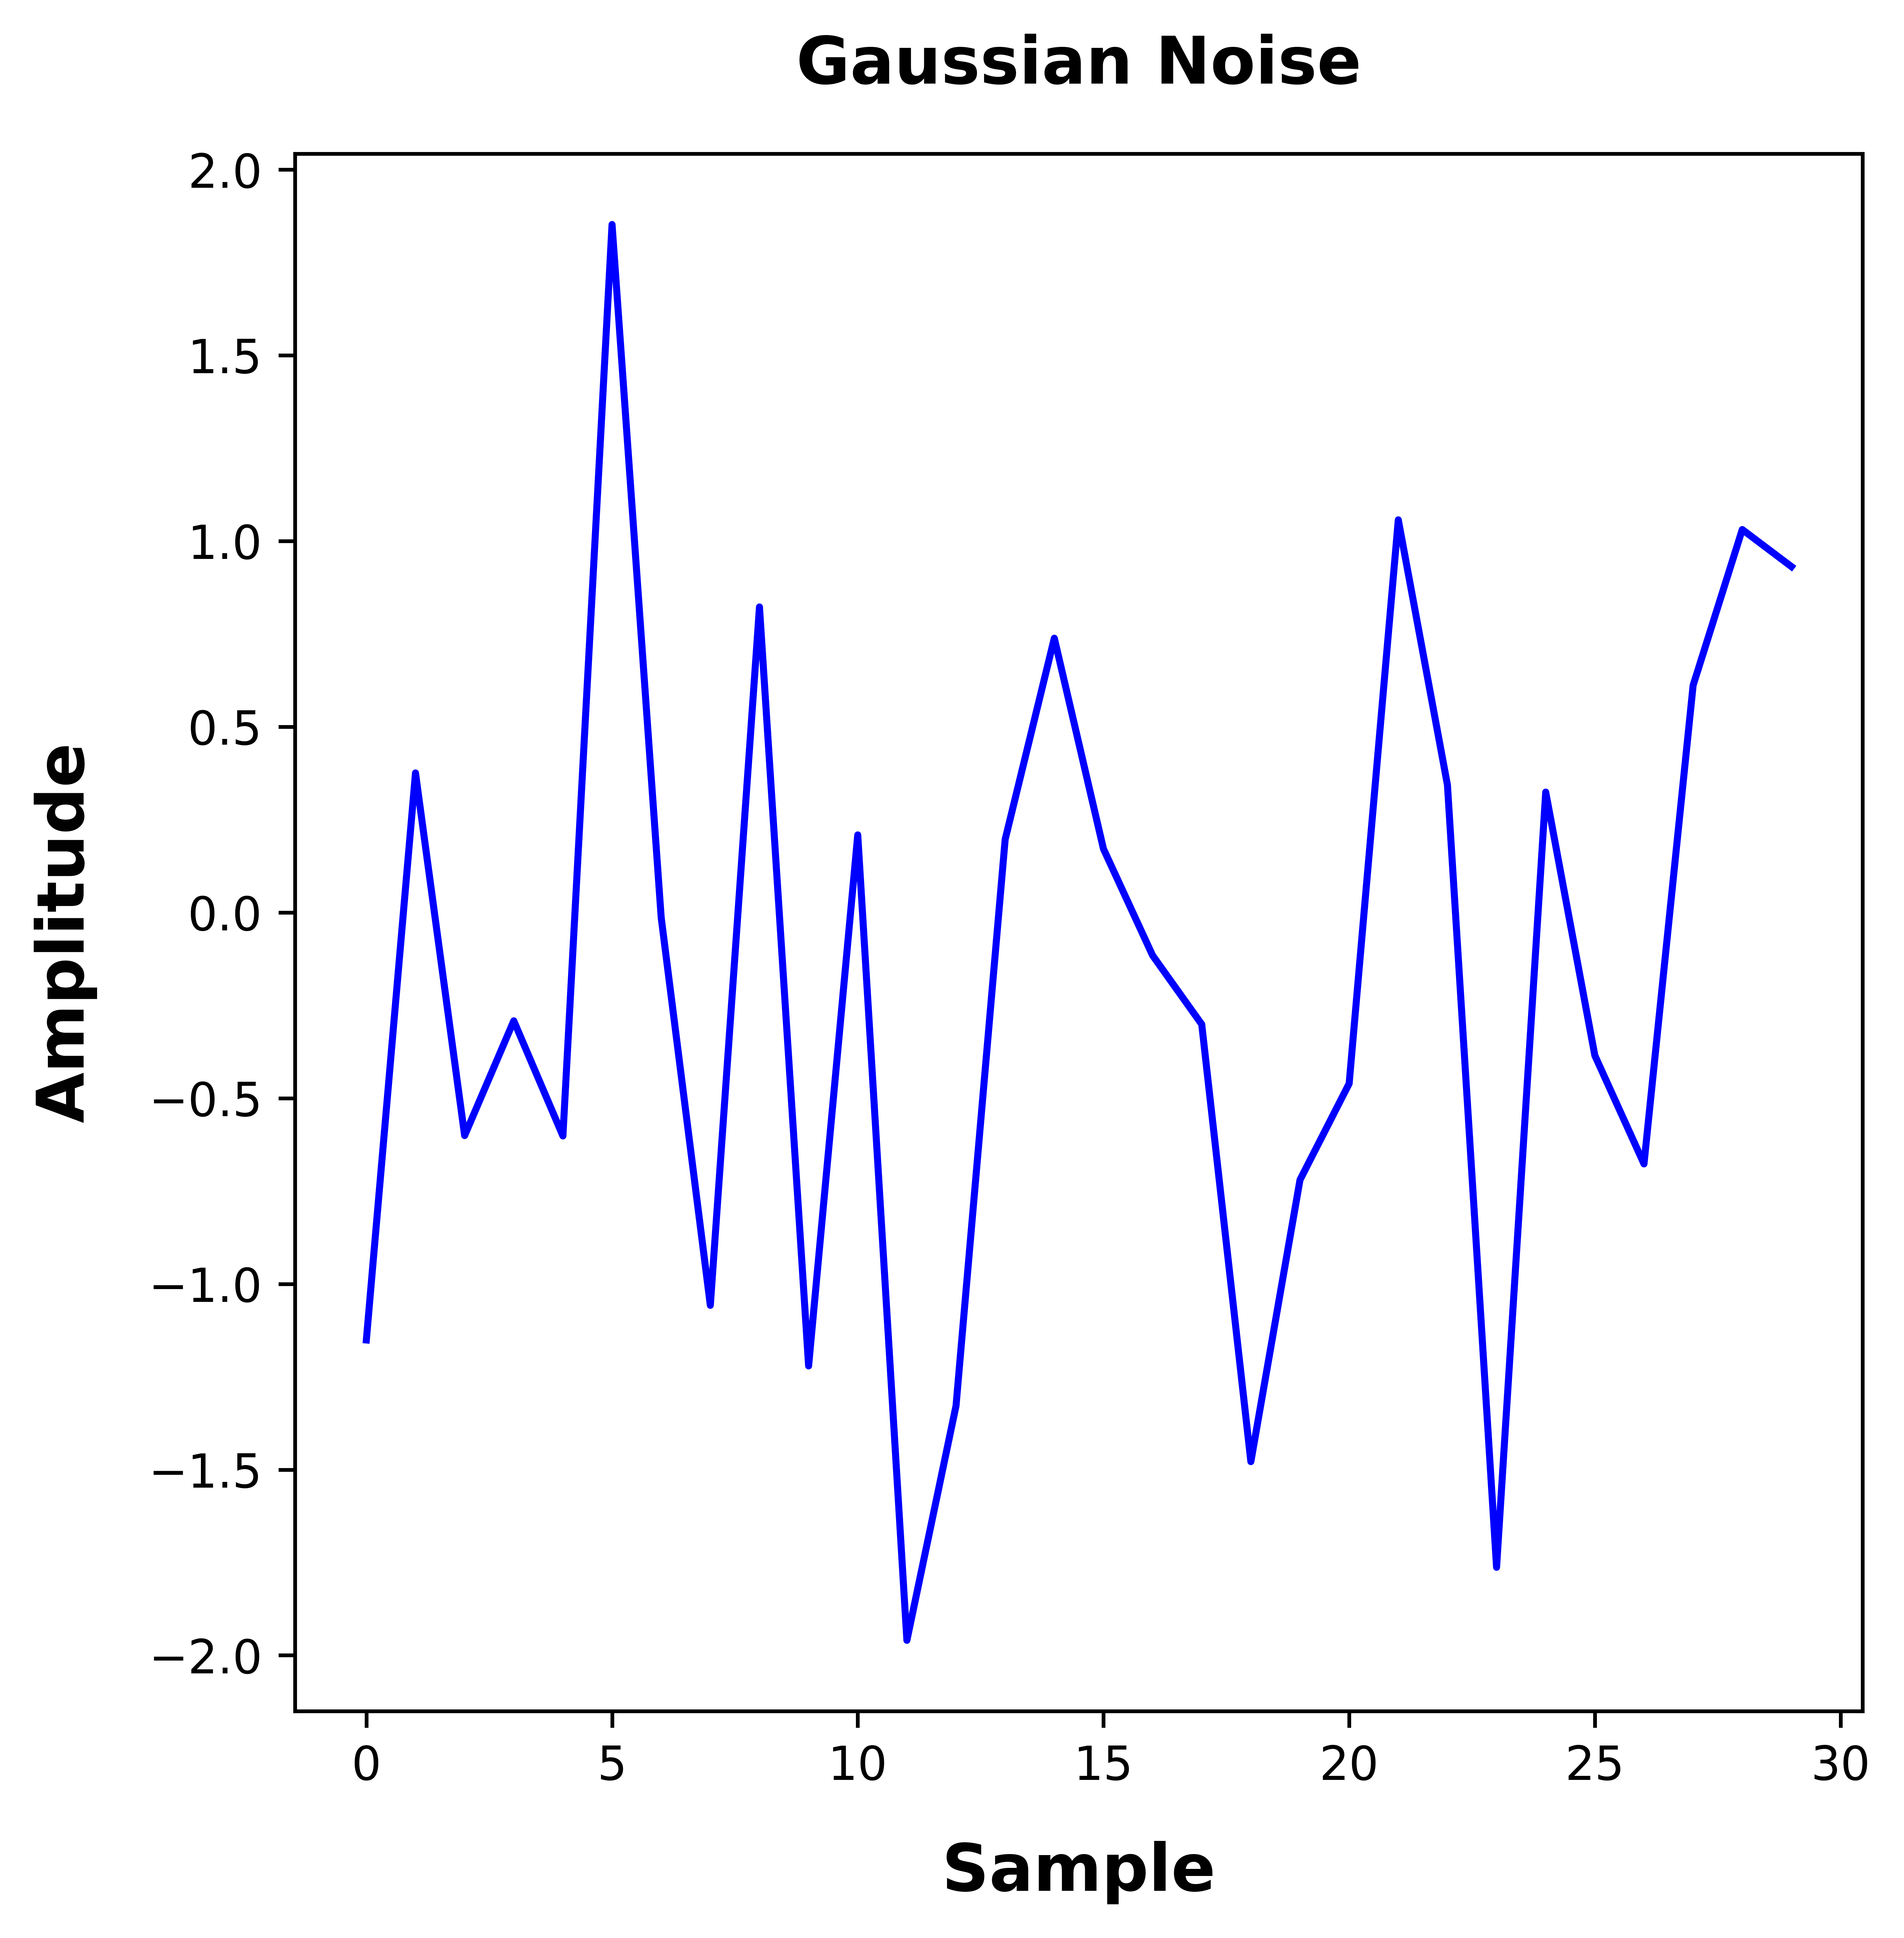

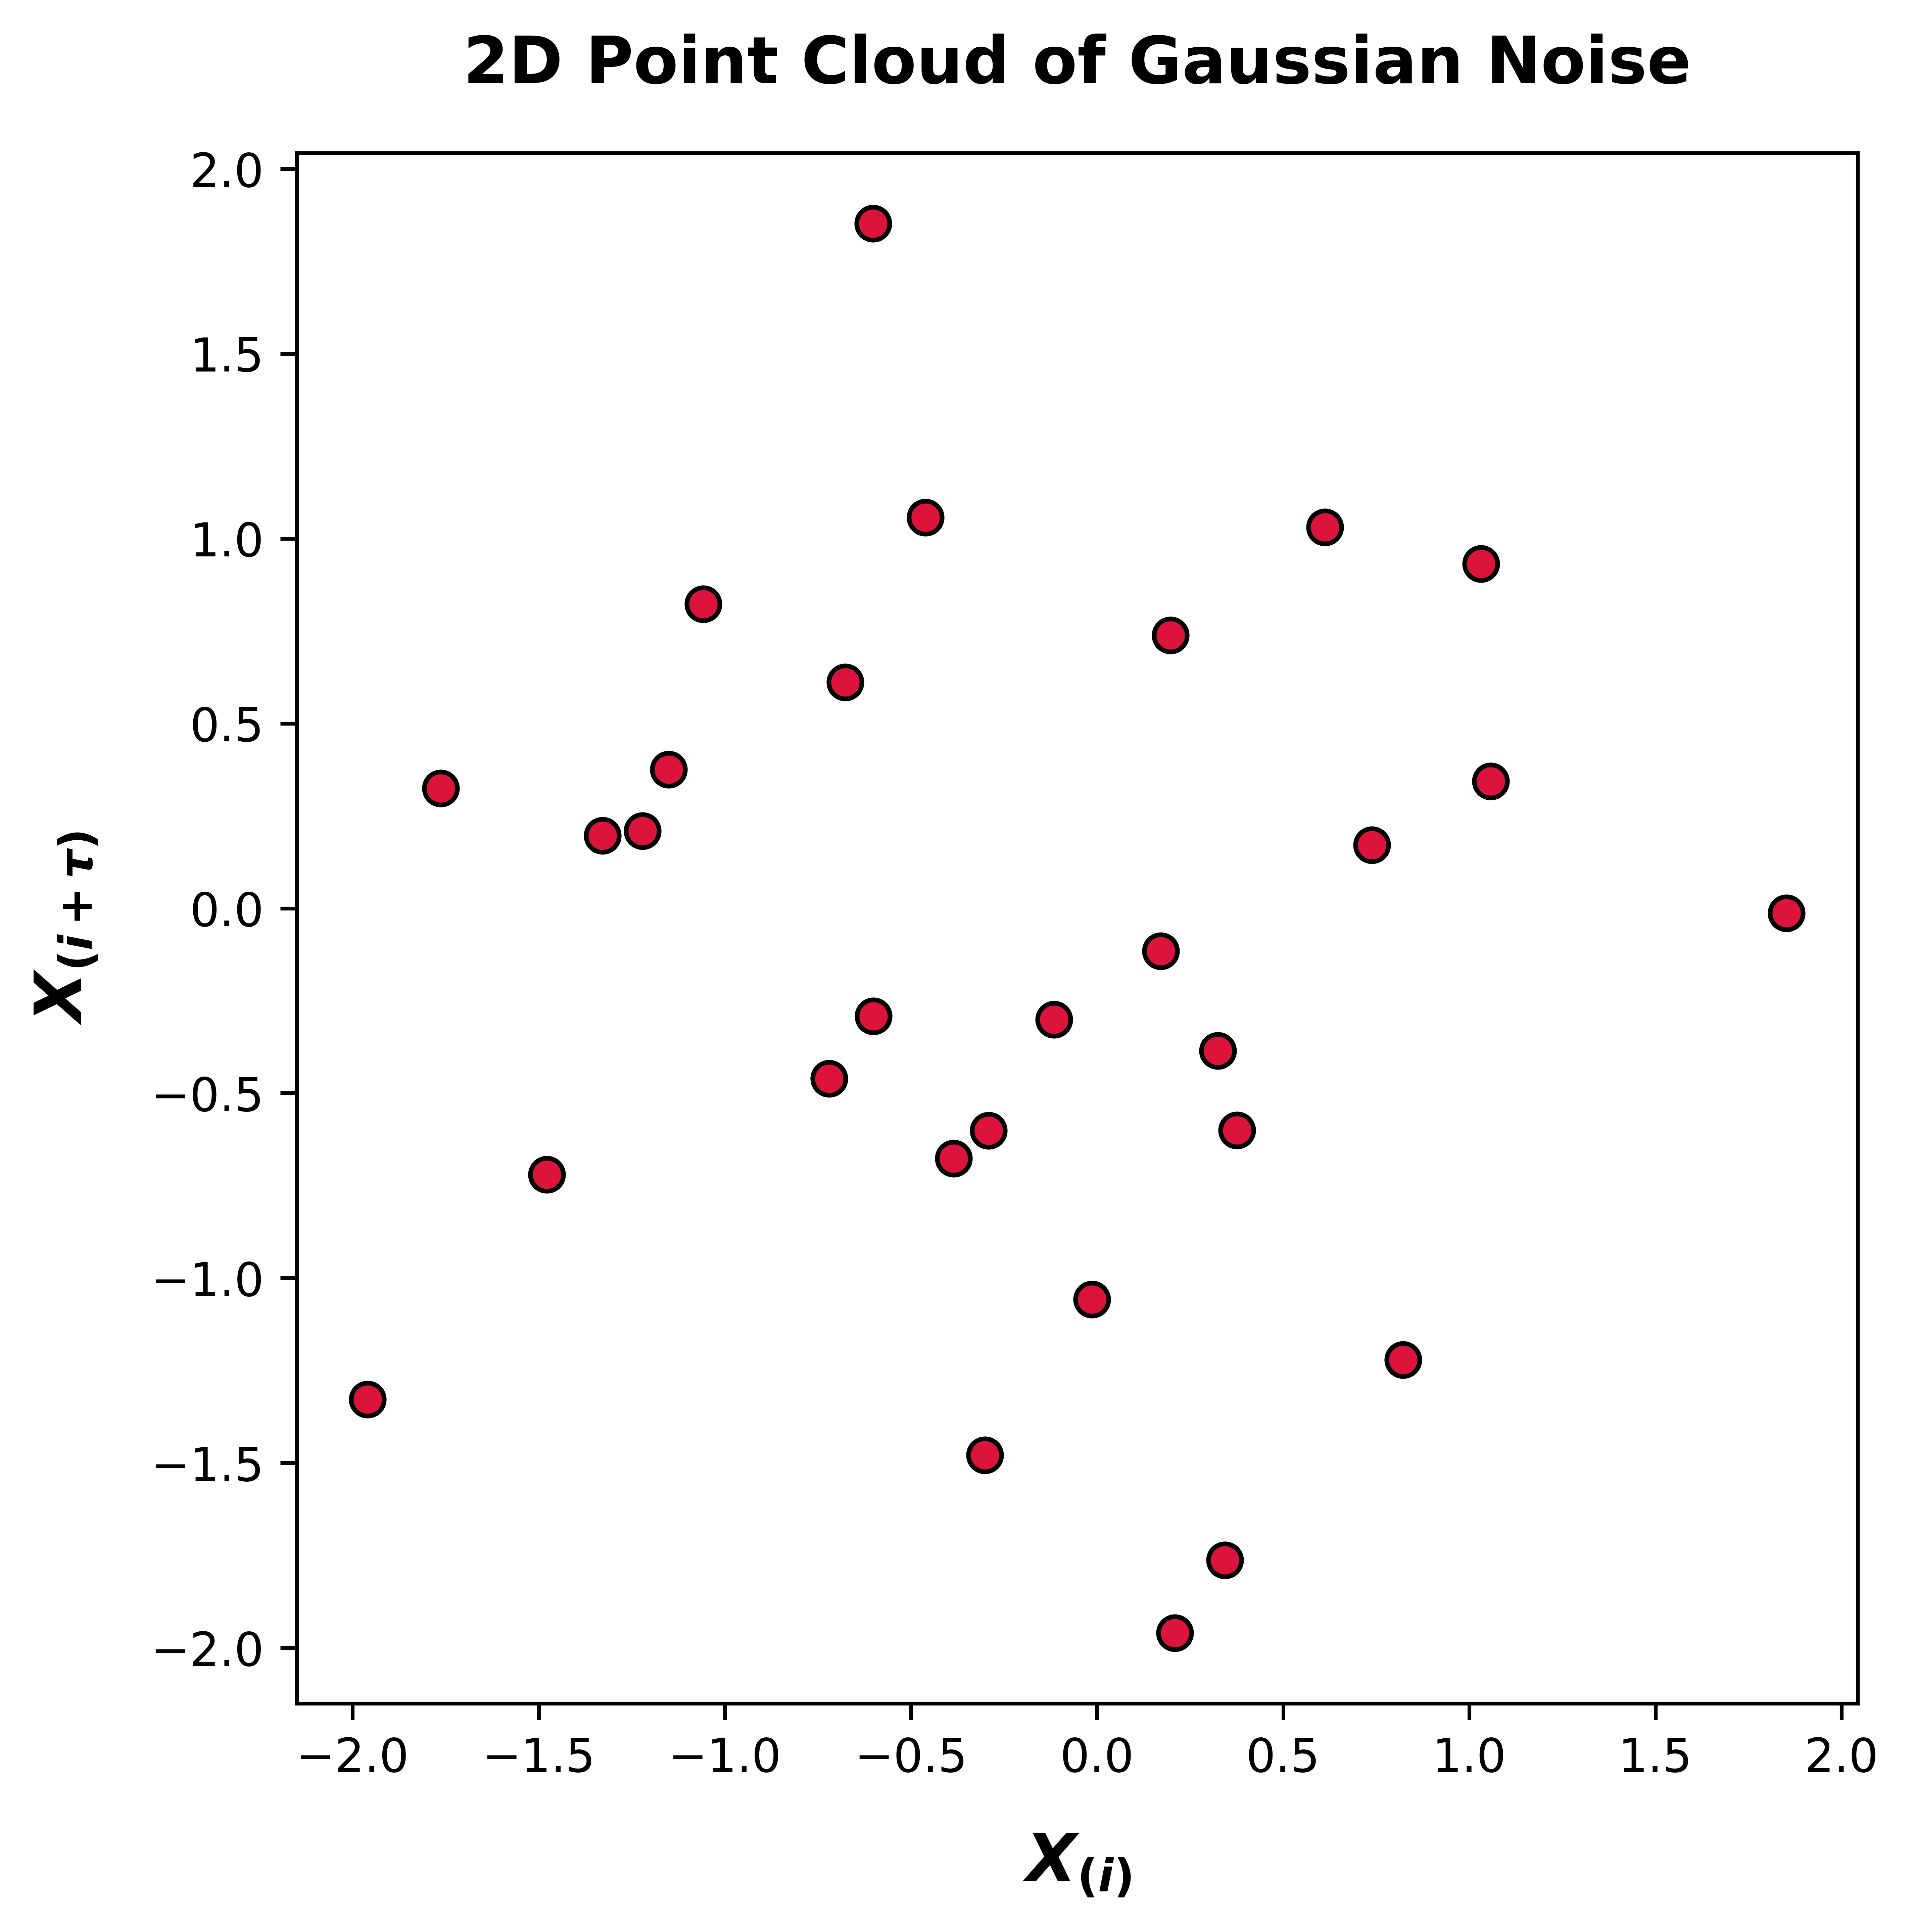

In [206]:
# Number of samples

N = 30

np.random.seed(42)

white_noise = np.random.uniform(-1, 1, N)

mu = 0  # Mean

sigma = 1  # Standard deviation

gaussian_noise = np.random.normal(mu, sigma, N)

# Gaussian Noise 

a = gaussian_noise

plt.figure(figsize = (6, 6), dpi = 1000)

plt.plot(gaussian_noise, color = 'blue')

plt.title('Gaussian Noise', fontsize = 14, pad = 15, fontweight = 'bold')

plt.xlabel('Sample', fontsize = 14, labelpad = 11, fontweight = 'bold')

plt.ylabel('Amplitude', fontsize = 14, labelpad = 11, fontweight = 'bold')

plt.savefig('../../images/gaussian_noise.png', bbox_inches = 'tight', dpi = 1000)

plt.show()

# 2D Point Cloud of Gaussian Noise

aa = takens_embedding(a, embedding_dimension = 2)

plt.figure(figsize = (6, 6), dpi = 1000)

plt.title('2D Point Cloud of Gaussian Noise', fontsize = 14, pad = 15, fontweight = 'bold') 

plt.xlabel(r'$\mathbf{\boldsymbol{X}_{(\boldsymbol{i})}}$', fontsize = 14, labelpad = 11)

plt.ylabel(r'$\mathbf{\boldsymbol{X}_{(\boldsymbol{i}+\boldsymbol{\tau})}}$', fontsize = 14, labelpad = 11)

plt.scatter(aa[:, 0], aa[:, 1], color = '#DC143B', marker = '.', edgecolors = 'black', s = 200)

plt.savefig('../../images/gaussian_point_cloud.png', bbox_inches = 'tight', dpi = 1000)

plt.show()

aaa = persistent_homology(aa)


# Persistence Diagram of Gaussian Noise

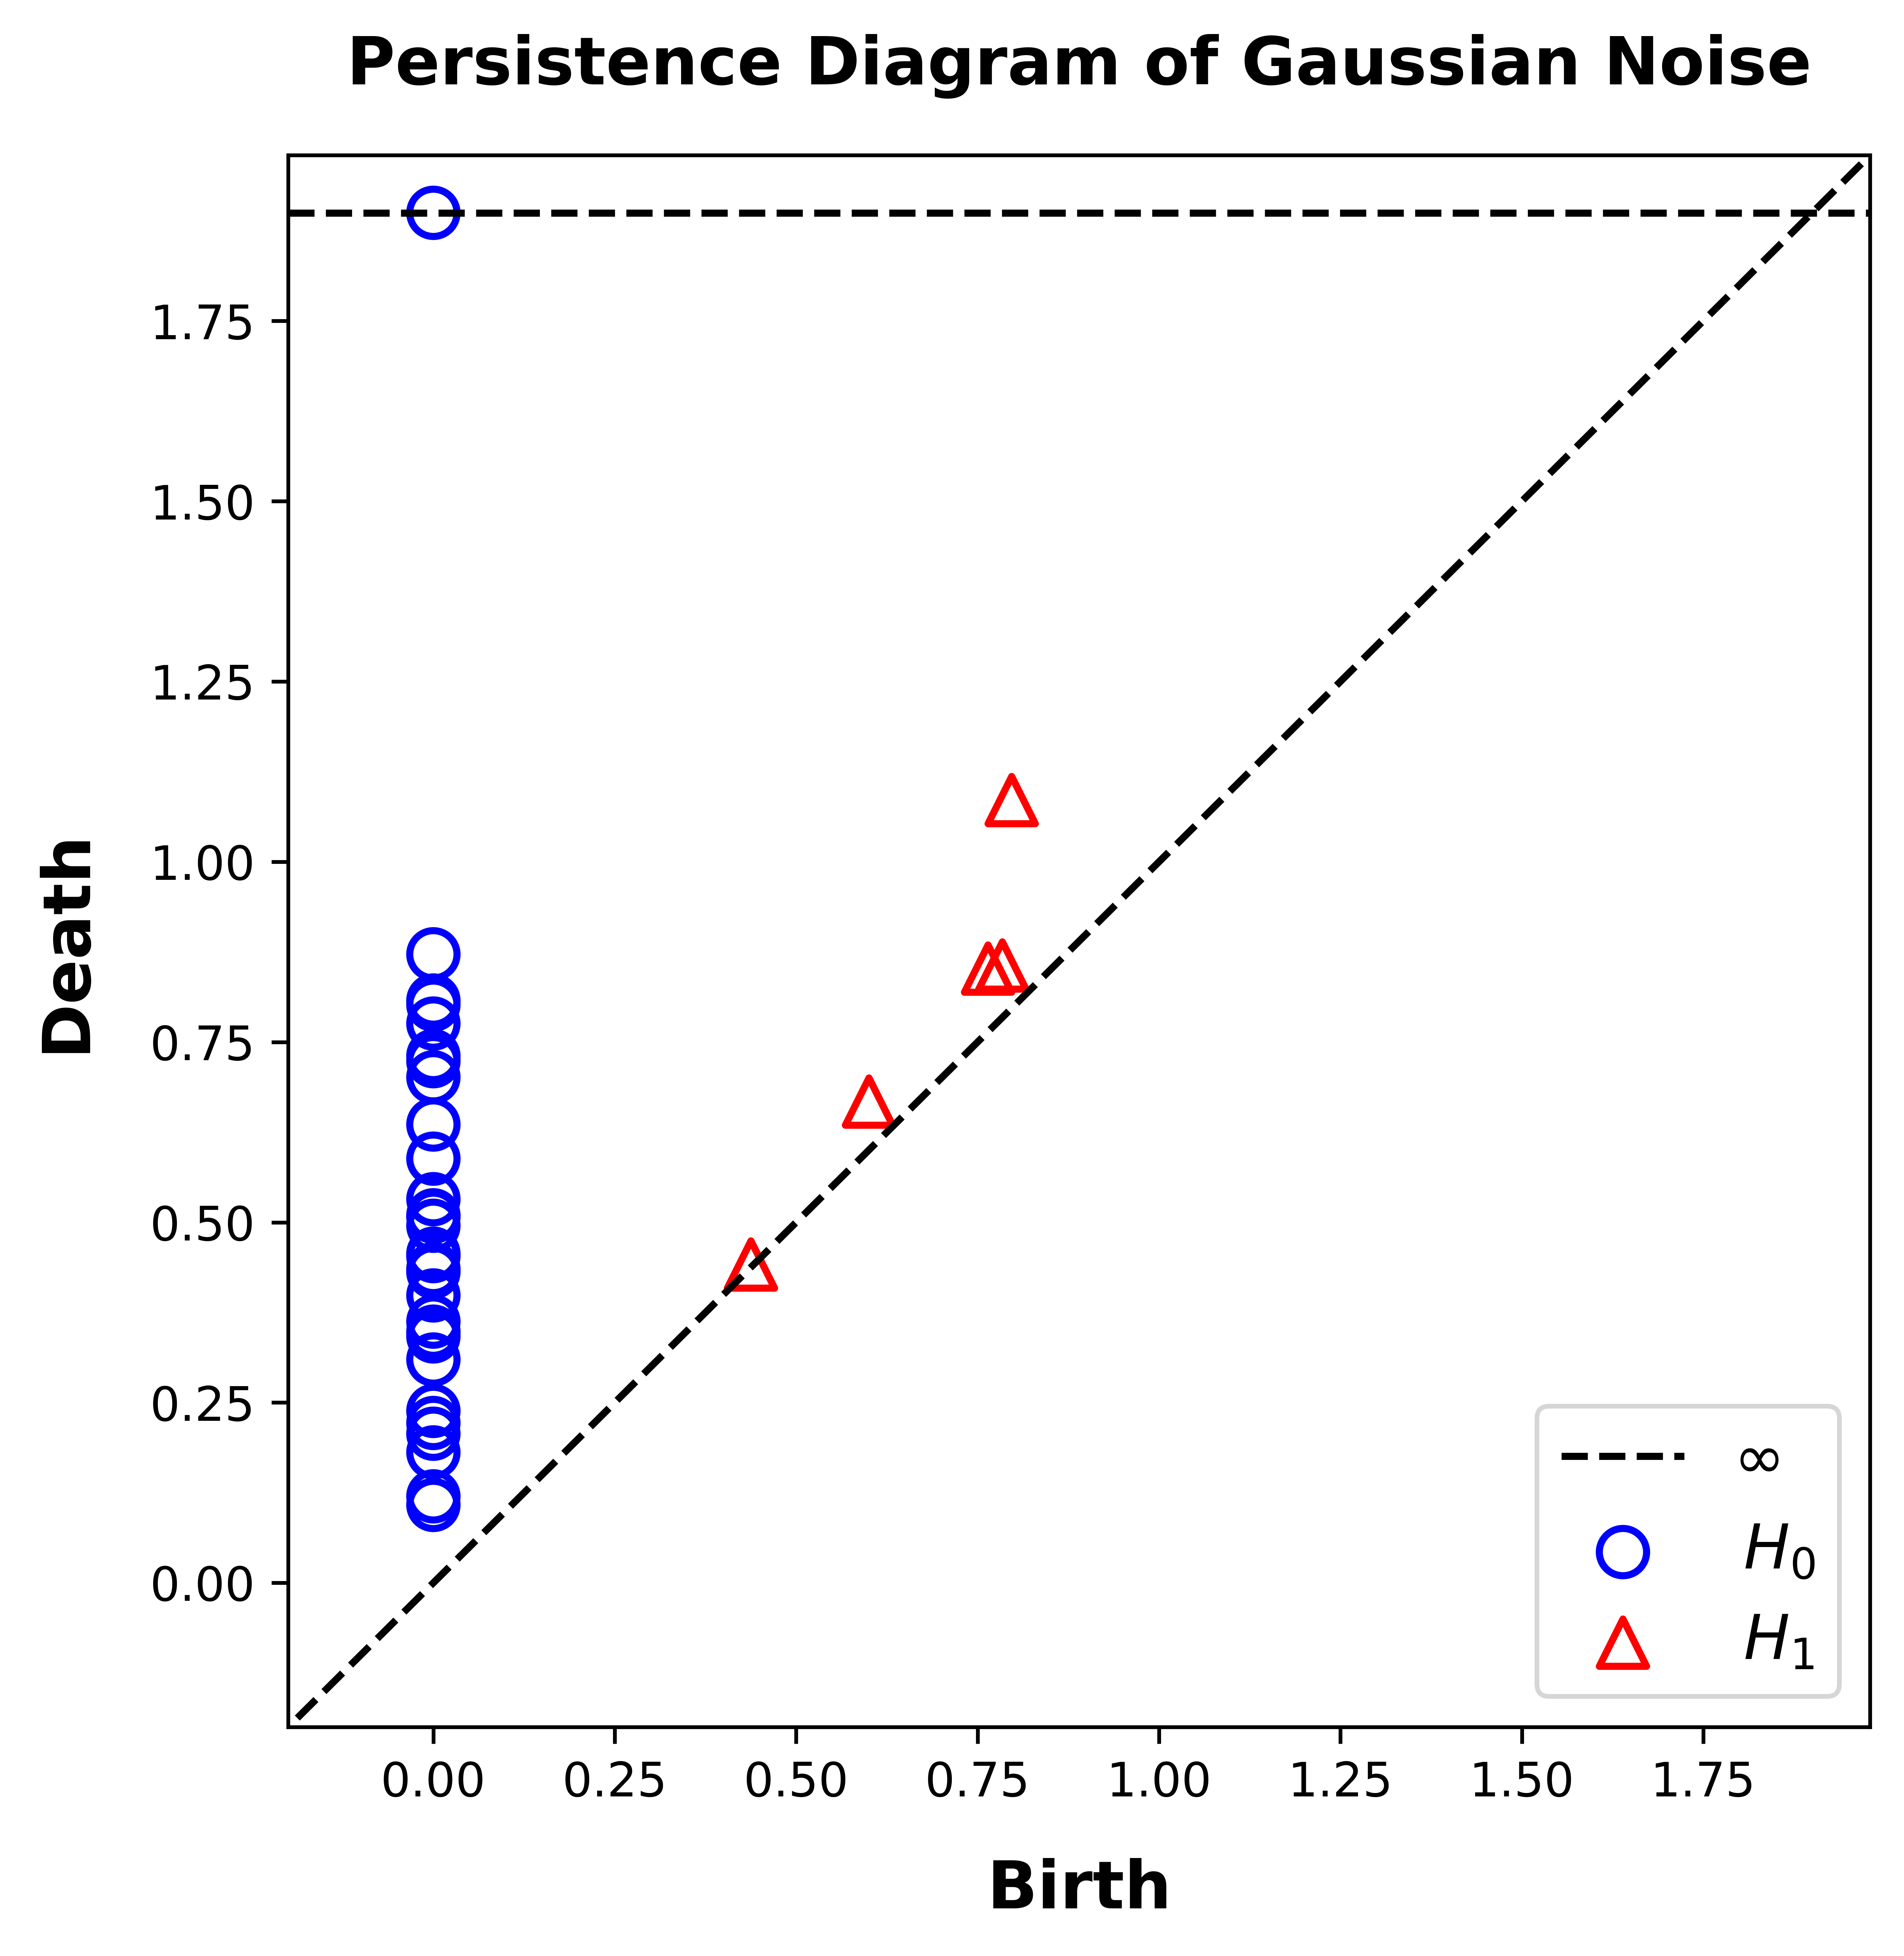

In [208]:
plt.figure(figsize = (6, 6), dpi = 1000)

x = np.linspace(-1, 3, 100)

plt.plot(x, x, 'k--', label = r'$\infty$')  

data1_h0 = r'$ \, H_{0}$'

data1_h1 = r'$ \, H_{1}$'

marker1 = 'o'

marker2 = '^'

size1 = 100

plt.scatter(aaa[0][:, 0], aaa[0][:, 1], color = 'blue', marker = marker1, facecolors = 'none', label = data1_h0, s = size1, linewidths = 1.5)

plt.scatter(0, 1.9, color = 'blue', marker = marker1, facecolors = 'none', s = size1, linewidths = 1.5)

plt.scatter(aaa[1][:, 0], aaa[1][:, 1], color = 'red', marker = marker2, facecolors = 'none', label = data1_h1, s = size1, linewidths = 1.5)

plt.axhline(y = 1.9, color = 'k', linestyle = '--')

plt.legend(loc = 'lower right', fontsize = 13)

plt.xlabel('Birth', fontsize = 14, labelpad = 11, fontweight = 'bold')

plt.ylabel('Death', fontsize = 14, labelpad = 11, fontweight = 'bold')

plt.title("Persistence Diagram of Gaussian Noise", fontsize = 14, pad = 15, fontweight = 'bold')

plt.xlim(-0.2, 1.98)

plt.ylim(-0.2, 1.98)

plt.savefig('../../images/gaussian_persistence_diagram.png', bbox_inches = 'tight', dpi = 1000)

plt.show()

# Three plots merged together

In [210]:
plt.figure(figsize = (20, 6), dpi = 1000)

plt.subplot(1, 3, 1)

plt.plot(gaussian_noise, color = 'blue')

plt.title('Gaussian Noise', fontsize = 14, pad = 15, fontweight = 'bold')

plt.xlabel('Sample', fontsize = 14, labelpad = 11, fontweight = 'bold')

plt.ylabel('Amplitude', fontsize = 14, labelpad = 11, fontweight = 'bold')

plt.subplot(1, 3, 2) 

plt.title('2D Point Cloud of Gaussian Noise', fontsize = 14, pad = 15, fontweight = 'bold') 

plt.xlabel(r'$\mathbf{\boldsymbol{X}_{(\boldsymbol{i})}}$', fontsize = 14, labelpad = 11)

plt.ylabel(r'$\mathbf{\boldsymbol{X}_{(\boldsymbol{i}+\boldsymbol{\tau})}}$', fontsize = 14, labelpad = 11)

plt.scatter(aa[:, 0], aa[:, 1], color = '#DC143B', marker = '.', edgecolors = 'black', s = 200)

plt.subplot(1, 3, 3)

x = np.linspace(-1, 3, 100)

plt.plot(x, x, 'k--', label = r'$\infty$')  

data1_h0 = r'$ \, H_{0}$'

data1_h1 = r'$ \, H_{1}$'

marker1 = 'o'

marker2 = '^'

size1 = 100

plt.scatter(aaa[0][:, 0], aaa[0][:, 1], color = 'blue', marker = marker1, facecolors = 'none', label = data1_h0, s = size1, linewidths = 1.5)

plt.scatter(0, 1.9, color = 'blue', marker = marker1, facecolors = 'none', s = size1, linewidths = 1.5)

plt.scatter(aaa[1][:, 0], aaa[1][:, 1], color = 'red', marker = marker2, facecolors = 'none', label = data1_h1, s = size1, linewidths = 1.5)

plt.axhline(y = 1.9, color = 'k', linestyle = '--')

plt.legend(loc = 'lower right', fontsize=13)

plt.xlabel('Birth', fontsize = 14, labelpad = 11, fontweight = 'bold')

plt.ylabel('Death', fontsize = 14, labelpad = 11, fontweight = 'bold')

plt.title("Persistence Diagram of Gaussian Noise", fontsize = 14, pad = 15, fontweight = 'bold')

plt.xlim(-0.2, 1.98)

plt.ylim(-0.2, 1.98)

plt.savefig('../../images/gaussian_3pictogether.png', bbox_inches = 'tight', dpi = 1000)

plt.show()

# Persistence Barcodes of Gaussian Noise

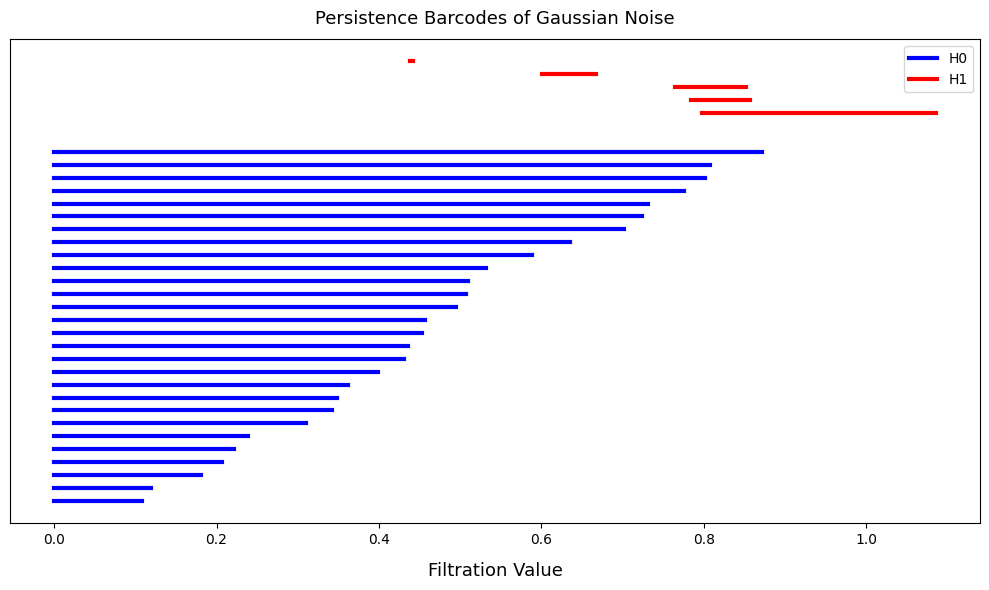

In [212]:
dgms = aaa

dgms_clean = [dgm[dgm[:, 1] != np.inf] for dgm in dgms]

plt.figure(figsize = (10, 6))

offset_H0 = 0

for i, (birth, death) in enumerate(dgms_clean[0]):
    
    plt.plot([birth, death], [i + offset_H0, i + offset_H0], color = 'blue', lw = 3, label = 'H0' if i == 0 else "")

offset_H1 = len(dgms_clean[0]) + 2

for i, (birth, death) in enumerate(dgms_clean[1]):
    
    plt.plot([birth, death], [i + offset_H1, i + offset_H1], color = 'red', lw = 3, label = 'H1' if i == 0 else "")

plt.xlabel("Filtration Value", fontsize = 13, labelpad = 11)

plt.title("Persistence Barcodes of Gaussian Noise", fontsize = 13, pad = 11)

plt.legend(loc = 'upper right')

plt.yticks([])

plt.tight_layout()

plt.savefig('../../images/gaussian_persistence_barcodes.png')

plt.show()
